<a href="https://colab.research.google.com/github/Jesteban247/Intro_AI/blob/main/Projects/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Based on the problem. we have two possible solutions.

* The first one is less efficient because it provides a list of heuristics to the A* algorithm based on the distance to achieve the node through various movements. This approach is less efficient and will waste resources.

* The second solution is better because it calculates the A* algorithm based on the Manhattan distance, which is a heuristic that is close to the actual distance. This approach is more efficient and will waste fewer resources compared to the first solution, which provides a list of heuristics to the A* algorithm based on the distance to achieve the node through various movements.

# **Libraries**

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import heapq

from matplotlib.colors import ListedColormap
from collections import deque

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Solution 1**

## Class Graph

This class represents a graph data structure and includes methods for adding edges and node information, printing the graph, performing breadth-first search (BFS), depth-first search (DFS), generating heuristic values, calculating heuristic values, finding shortest path lengths, and implementing the A* algorithm. Each method is commented to explain its purpose and functionality.

In [66]:
class Graph:
    def __init__(self):
        # Initialize the adjacency list and node information dictionary
        self.adj_list = {}
        self.node_info = {}

    def add_edge(self, node1, node2):
        # Add an edge between node1 and node2
        if node1 in self.adj_list:
            self.adj_list[node1].append(node2)
        else:
            self.adj_list[node1] = [node2]

    def add_node_info(self, node, info):
        # Add information to a node
        self.node_info[node] = info

    def print_graph(self):
        # Print the graph as adjacency lists
        for node, neighbors in self.adj_list.items():
            print(f"Node {node}:", neighbors)

    # Breadth-First Search (BFS)
    def bfs(self, start_node, goal_node):
        visited = set()
        queue = deque([(start_node, [start_node])])
        visited_order = []
        while queue:
            current_node, path = queue.popleft()
            visited_order.append(current_node)
            if current_node == goal_node:
                print("Visited nodes:", ', '.join(map(str, visited_order)))
                print("Path:", ' -> '.join(map(str, path)))
                return True
            visited.add(current_node)
            for neighbor in self.adj_list.get(current_node, []):
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))
        print("No path found")
        return False

    # Depth-First Search (DFS)
    def dfs(self, start_node, goal_node):
        visited = set()
        stack = [(start_node, [start_node])]
        visited_order = []
        while stack:
            current_node, path = stack.pop()
            visited_order.append(current_node)
            if current_node == goal_node:
                print("Visited nodes:", ', '.join(map(str, visited_order)))
                print("Path:", ' -> '.join(map(str, path)))
                return True
            visited.add(current_node)
            for neighbor in self.adj_list.get(current_node, []):
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))
        print("No path found")
        return False

    # Heuristic functions
    def generate_heuristic_list(self, goal_node):
        # Generate heuristic values for all nodes based on the goal node
        heuristic_list = {}
        for node in self.adj_list:
            heuristic_list[node] = self.heuristic(node, goal_node)
        return heuristic_list

    def heuristic(self, node, goal):
        # Calculate the heuristic value for a node based on the goal node
        if node == goal:
            return 0  # If the node is the goal, heuristic value is 0
        elif node not in self.adj_list or goal not in self.adj_list:
            return float('inf')  # If either node or goal is not reachable, return infinity
        else:
            # Calculate the shortest path distance (number of edges) from node to goal
            shortest_path = self.shortest_path_length(node, goal)
            return shortest_path

    def shortest_path_length(self, start, goal):
        # Calculate the shortest path length from start node to goal node using BFS
        visited = set()
        queue = [(start, 0)]  # (node, distance)
        while queue:
            node, distance = queue.pop(0)
            if node == goal:
                return distance
            visited.add(node)
            for neighbor in self.adj_list.get(node, []):
                if neighbor not in visited:
                    queue.append((neighbor, distance + 1))
        return float('inf')  # Return infinity if no path found

    # A* algorithm
    def a_star(self, start_node, goal_node, heuristic_list):
        open_list = [(start_node, 0, heuristic_list[start_node], [])]  # (node, real_cost, estimated_cost, path)
        closed_set = set()
        while open_list:
            current_node, real_cost, estimated_cost, path = min(open_list, key=lambda x: x[1] + x[2])
            open_list.remove((current_node, real_cost, estimated_cost, path))
            closed_set.add(current_node)
            path = path + [current_node]
            if current_node == goal_node:
                return path
            for neighbor in self.adj_list.get(current_node, []):
                if neighbor in closed_set:
                    continue
                new_real_cost = real_cost + 1  # Assuming uniform edge cost of 1
                new_estimated_cost = heuristic_list[neighbor]
                new_path = path[:]
                if (neighbor,) in open_list:
                    index = open_list.index((neighbor,))
                    if open_list[index][1] + open_list[index][2] > new_real_cost + new_estimated_cost:
                        open_list[index] = (neighbor, new_real_cost, new_estimated_cost, new_path)
                else:
                    open_list.append((neighbor, new_real_cost, new_estimated_cost, new_path))
        return None


## Class Maze

This class, MazeGraphBuilder, is responsible for constructing a graph representation of a maze based on a given matrix and its corresponding labels. It uses the Graph class defined earlier to build the graph. The maze can be visualized using the visualize_maze method, and the solution path can be highlighted using the solution_maze method.

In [67]:
class MazeGraphBuilder:
    def __init__(self, matrix, labels):
        # Initialize the MazeGraphBuilder with the given matrix and labels
        self.matrix = matrix
        self.labels = labels
        self.graph = Graph()  # Initialize a Graph object to build the maze graph
        self.build_graph()  # Build the graph from the matrix and labels

    def build_graph(self):
        # Build the graph based on the matrix and labels
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Define the possible movement directions
        rows = len(self.matrix)
        cols = len(self.matrix[0])

        # Iterate over each cell in the matrix
        for i in range(rows):
            for j in range(cols):
                label = self.labels[i][j]  # Get the label of the current cell
                if self.matrix[i][j] in [2, 0, 3]:  # Check if the cell is traversable (2, 0, or 3)
                    node_info = {'label': label, 'value': self.matrix[i][j]}
                    self.graph.add_node_info(label, node_info)  # Add node info to the graph
                    # Check neighboring cells for traversability and add edges accordingly
                    for dx, dy in directions:
                        ni, nj = i + dx, j + dy
                        if 0 <= ni < rows and 0 <= nj < cols:
                            neighbor_label = self.labels[ni][nj]
                            if self.matrix[ni][nj] in [2, 0, 3]:
                                self.graph.add_edge(label, neighbor_label)

    def get_graph(self):
        # Return the constructed graph
        return self.graph

    def visualize_maze(self):
        # Visualize the maze represented by the matrix and labels
        cmap = plt.cm.colors.ListedColormap(['white', 'blue', 'yellow', 'green'])  # Define colors
        bounds = [0, 1, 2, 3, 4]
        norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)  # Define normalization
        plt.imshow(self.matrix, cmap=cmap, norm=norm, interpolation='nearest')  # Display maze matrix

        # Add labels to the plot
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[i])):
                label = self.labels[i][j]
                plt.text(j, i, str(label), ha='center', va='center', color='black')

        plt.axis('off')  # Remove the axis
        plt.show()

    def solution_maze(self, shortest_path):
        # Visualize the maze with the solution path highlighted
        cmap = plt.cm.colors.ListedColormap(['white', 'blue', 'yellow', 'green', 'red'])  # Define colors
        bounds = [0, 1, 2, 3, 4, 5]
        norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)  # Define normalization
        plt.imshow(self.matrix, cmap=cmap, norm=norm, interpolation='nearest')  # Display maze matrix

        # Add labels to the plot
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[i])):
                label = self.labels[i][j]
                if label in shortest_path:  # Highlight nodes in the shortest path
                    plt.text(j, i, str(label), ha='center', va='center', color='red')
                #else:  # Optionally, display all nodes
                #   plt.text(j, i, str(label), ha='center', va='center', color='black')

        plt.axis('off')  # Remove the axis
        plt.show()


This function, plot_graph, takes a graph object as input and visualizes it using NetworkX and Matplotlib. It iterates over the nodes in the graph's node_info dictionary to add nodes to the graph with their labels as identifiers and determines node colors based on their values. It then adds edges to the graph based on the adjacency list. Finally, it uses the spring layout algorithm to generate node positions, draws the graph with specified visual properties, and displays the plot with the title "Maze Graph".

In [68]:
def plot_graph(graph):
    # Create a new graph object
    G = nx.Graph()

    # Initialize an empty list to store node colors
    node_colors = []

    # Iterate over each node in the graph's node_info dictionary
    for node, info in graph.node_info.items():
        # Add nodes to the graph using their labels as identifiers
        G.add_node(info['label'])

        # Determine node color based on node value
        if info['value'] == 0:
            node_colors.append('blue')  # Blue color for value 0
        elif info['value'] == 2:
            node_colors.append('yellow')  # Yellow color for value 2
        elif info['value'] == 3:
            node_colors.append('green')  # Green color for value 3

    # Add edges to the graph based on the adjacency list
    for node, neighbors in graph.adj_list.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    # Generate node positions using the spring layout algorithm
    pos = nx.spring_layout(G)

    # Draw the graph with labels, node colors, bold font weight, gray edge color, and specified arrow size
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold', edge_color='gray', linewidths=1,
            arrowsize=20)

    # Set the title of the plot
    plt.title("Maze Graph")

    # Display the plot
    plt.show()


## Create Maze and Graph

The read_matrix_from_file function reads a matrix from a text file line by line, parsing each line into a list of integers and appending it to the matrix. It returns the resulting matrix.

The generate_labels function generates labels for each cell in the input matrix. It assigns a unique label to each cell, starting from 1, and returns the resulting labels as a list of lists.

In [69]:
def read_matrix_from_file(file_path):

    matrix = []
    with open(file_path, 'r') as file:
        for line in file:
            row = list(map(int, line.strip()[1:-1].split(', ')))
            matrix.append(row)
    return matrix

def generate_labels(matrix):

    labels = []
    count = 1
    for i in range(len(matrix)):
        row_labels = []
        for j in range(len(matrix[i])):
            row_labels.append(count)
            count += 1
        labels.append(row_labels)
    return labels

In [70]:
# Read the matrix from a text file
file_path = "/content/drive/MyDrive/IA/maze.txt"  # Update with your file path
matrix = read_matrix_from_file(file_path)

# Generate labels for the matrix
labels = generate_labels(matrix)

# Build the graph
builder = MazeGraphBuilder(matrix, labels)

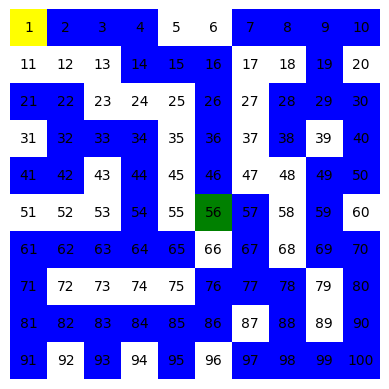

In [71]:
builder.visualize_maze()

In [72]:
graph = builder.get_graph()

# Print the graph
graph.print_graph()

Node 1: [11]
Node 5: [6]
Node 6: [5]
Node 11: [12, 1]
Node 12: [13, 11]
Node 13: [12, 23]
Node 17: [18, 27]
Node 18: [17]
Node 23: [24, 13]
Node 24: [25, 23]
Node 25: [24, 35]
Node 27: [37, 17]
Node 35: [45, 25]
Node 37: [47, 27]
Node 43: [53]
Node 45: [55, 35]
Node 47: [48, 37]
Node 48: [47, 58]
Node 51: [52]
Node 52: [53, 51]
Node 53: [52, 43]
Node 55: [56, 45]
Node 56: [55, 66]
Node 58: [68, 48]
Node 66: [56]
Node 68: [58]
Node 72: [73]
Node 73: [74, 72]
Node 74: [75, 73]
Node 75: [74]
Node 79: [89]
Node 89: [79]


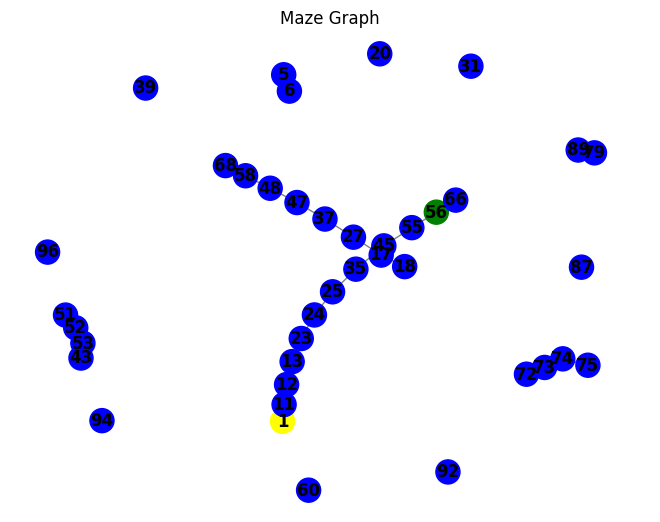

In [73]:
# Plot the graph
plot_graph(graph)

## Paths

### BFS ans DFS

1. **Breadth-First Search (BFS):**
  
  BFS is an algorithm used to traverse or search a graph or tree data structure. It starts at a given source node and explores all the neighbor nodes at the present depth before moving on to the nodes at the next depth level. BFS employs a queue data structure to keep track of the nodes to visit next.

  **Process of BFS:**
  1. Start with a queue containing the source node.
  2. While the queue is not empty, do the following:
    - Dequeue a node from the front of the queue.
    - Visit the dequeued node.
    - Enqueue all its neighbors that have not been visited and mark them as visited.
  3. Repeat step 2 until the queue becomes empty.

  **Key Characteristics:**
  - BFS explores all nodes at a given depth level before moving to the next level.
  - It guarantees the shortest path from the source to all reachable nodes in an unweighted graph.


2. **Depth-First Search (DFS):**

  DFS is another algorithm used for traversing or searching a graph or tree data structure. Unlike BFS, DFS explores as far as possible along each branch before backtracking. It employs a stack data structure or recursive function calls to keep track of the nodes to visit next.

  **Process of DFS:**
  1. Start with the source node.
  2. Visit the source node and mark it as visited.
  3. Recursively visit each neighbor of the current node that has not been visited.
  4. Repeat step 3 for each unvisited neighbor until all nodes have been visited.

  **Key Characteristics:**
  - DFS explores as deep as possible along each branch before backtracking.
  - It may not find the shortest path from the source to a destination.
  - DFS is often implemented using recursion, but it can also be implemented iteratively using a stack data structure.

![Difference between BFS and DFS - GeeksforGeeks](https://media.geeksforgeeks.org/wp-content/uploads/20240219134945/bfs-vs-dfs-(1).png)


In [74]:
graph = builder.get_graph()

start_node = 1
goal_node = 56

print("BFS from", start_node, "to", goal_node)
graph.bfs(start_node, goal_node)
print("\nDFS from", start_node, "to", goal_node)
graph.dfs(start_node, goal_node)

BFS from 1 to 56
Visited nodes: 1, 11, 12, 13, 23, 24, 25, 35, 45, 55, 56
Path: 1 -> 11 -> 12 -> 13 -> 23 -> 24 -> 25 -> 35 -> 45 -> 55 -> 56

DFS from 1 to 56
Visited nodes: 1, 11, 12, 13, 23, 24, 25, 35, 45, 55, 56
Path: 1 -> 11 -> 12 -> 13 -> 23 -> 24 -> 25 -> 35 -> 45 -> 55 -> 56


True

### Heuristic and A*

1. **Heuristic Function:**
   - A heuristic function provides an informed estimate of the cost from a given node to the goal node in a graph.
   - In this case, the heuristic function calculates the shortest path distance (number of edges) from the current node to the goal node.
   - It aims to guide the A* algorithm by providing a hint about which nodes to explore first, potentially leading to a more efficient search.
   - If the current node is the goal node, the heuristic function returns 0, indicating that no further cost is required.
   - If either the current node or the goal node is not reachable, the function returns infinity to signify that the goal is unreachable from the current node.
   - Otherwise, it calculates the shortest path length from the current node to the goal node. This calculation typically involves employing algorithms like BFS in this case.

In [75]:
heuristic_list = graph.generate_heuristic_list(56)
print (heuristic_list)

{1: 10, 5: inf, 6: inf, 11: 9, 12: 8, 13: 7, 17: inf, 18: inf, 23: 6, 24: 5, 25: 4, 27: inf, 35: 3, 37: inf, 43: inf, 45: 2, 47: inf, 48: inf, 51: inf, 52: inf, 53: inf, 55: 1, 56: 0, 58: inf, 66: 1, 68: inf, 72: inf, 73: inf, 74: inf, 75: inf, 79: inf, 89: inf}


2. A* algorithm

  * The A* algorithm is a pathfinding algorithm that combines the advantages of both Dijkstra's algorithm and greedy best-first search. It finds the shortest path from a start node to a goal node.
  * In each iteration, the algorithm selects the node with the lowest total cost, which is the sum of the cost to reach the node (real_cost) and the estimated cost from that node to the goal (heuristic value).
  * The open_list contains nodes to be explored, sorted by their total cost. The algorithm selects the node with the lowest total cost from this list.
  * The closed_set keeps track of nodes that have already been visited to avoid revisiting them.
  * The algorithm continues to explore nodes until it finds the goal node or exhausts all possible paths.
  * The real_cost is calculated by incrementing the cost from the start node to the current node by one (assuming uniform edge cost).
  * The estimated_cost is obtained from the heuristic_list, which contains heuristic values for all nodes based on the goal node.
  * If a more optimal path to a node is found during exploration, the algorithm updates the open_list with the
  new path and cost.
  * If the goal node is found, the algorithm returns the path from the start node to the goal node.

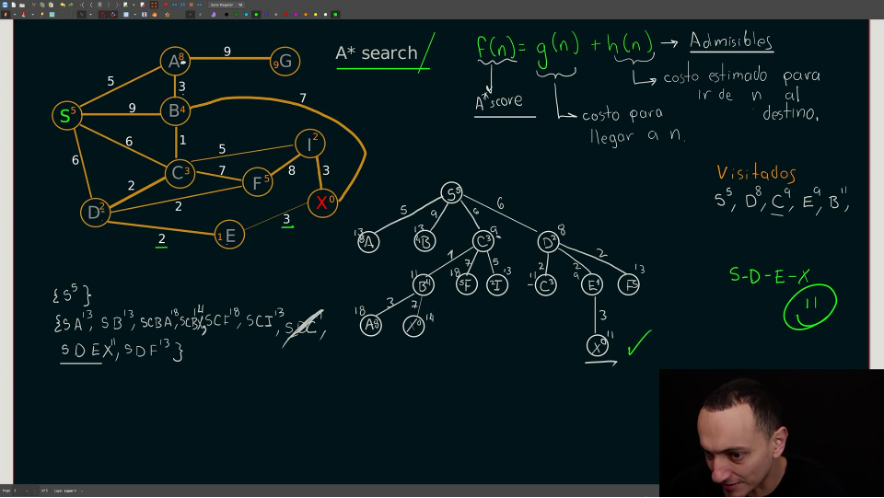

In [76]:
shortest_path = graph.a_star(1, 56, heuristic_list)
print("Shortest Path:", shortest_path)

Shortest Path: [1, 11, 12, 13, 23, 24, 25, 35, 45, 55, 56]


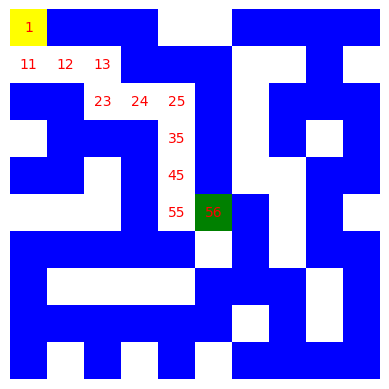

In [77]:
builder.solution_maze(shortest_path)

# **Solution 2**

## Maze

In [78]:
# Lee el archivo de texto
with open('/content/drive/MyDrive/IA/maze3.txt', 'r') as f:
    lines = f.readlines()

# Procesa las líneas para obtener la matriz
matrix = []
for line in lines:
    row = [int(x) for x in line.strip().strip('[]').split(',')]
    matrix.append(row)

# Convierte la matriz a un array numpy
matrix = np.array(matrix)

<ipython-input-79-c63cdb1e357f>:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[0].add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=color, edgecolor='black'))
<ipython-input-79-c63cdb1e357f>:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[1].add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=color, edgecolor='black'))


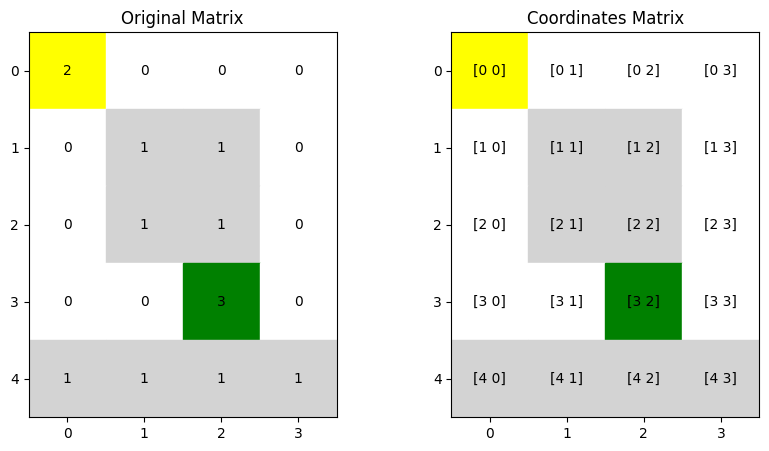

In [79]:
# Convert the matrix to coordinates
coordinates = np.array([[(i, j) for j in range(matrix.shape[1])] for i in range(matrix.shape[0])])

# Create dictionary of coordinates and values
coordinates_values = {(i, j): matrix[i, j] for i in range(matrix.shape[0]) for j in range(matrix.shape[1])}

# Create custom color map
colors = ['white', 'lightgray', 'yellow', 'green']
cmap = ListedColormap(colors)

# Create the plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot original matrix with specified colors
axs[0].imshow(np.arange(matrix.size).reshape(matrix.shape), cmap=cmap, interpolation='nearest')

# Add values from the original matrix
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        color = colors[matrix[i, j]]
        axs[0].add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=color, edgecolor='black'))
        axs[0].text(j, i, str(matrix[i, j]), ha='center', va='center')

axs[0].set_title('Original Matrix')
axs[0].grid(False)

# Plot the coordinates matrix
axs[1].imshow(matrix, cmap='gray', interpolation='nearest')

# Add colors based on the dictionary of values
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        value = coordinates_values[(i, j)]
        color = colors[value]
        axs[1].add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=color, edgecolor='black'))
        axs[1].text(j, i, str(coordinates[i, j]), ha='center', va='center')

axs[1].set_title('Coordinates Matrix')
axs[1].grid(False)

plt.show()

In [80]:
print(coordinates_values)

{(0, 0): 2, (0, 1): 0, (0, 2): 0, (0, 3): 0, (1, 0): 0, (1, 1): 1, (1, 2): 1, (1, 3): 0, (2, 0): 0, (2, 1): 1, (2, 2): 1, (2, 3): 0, (3, 0): 0, (3, 1): 0, (3, 2): 3, (3, 3): 0, (4, 0): 1, (4, 1): 1, (4, 2): 1, (4, 3): 1}


## Class Graph

In [81]:
class Node:
    def __init__(self, x, y, identifier):
        # Initialize a node with its coordinates and identifier
        self.x = x
        self.y = y
        self.identifier = identifier

class Graph:
    def __init__(self, coordinates_values):
        # Initialize the graph with coordinates and build nodes and adjacency list
        self.coordinates_values = coordinates_values
        self.nodes = self._build_nodes()  # List of nodes
        self.adjacency_list = self._build_adjacency_list()  # Dictionary representing adjacency list

    def _build_nodes(self):
        # Create nodes from given coordinates
        nodes = []
        for coord, identifier in self.coordinates_values.items():
            node = Node(coord[0], coord[1], identifier)
            nodes.append(node)
        return nodes

    def _build_adjacency_list(self):
        # Build adjacency list for non-obstacle nodes
        adjacency_list = {}

        for node in self.nodes:
            if node.identifier != 1:  # If not an obstacle
                neighbors = self._get_neighbors(node)
                adjacency_list[(node.x, node.y, node.identifier)] = neighbors

        return adjacency_list

    def _get_neighbors(self, node):
        # Get neighbors of a node
        neighbors = []

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor_x = node.x + dx
            neighbor_y = node.y + dy
            for other_node in self.nodes:
                if other_node.x == neighbor_x and other_node.y == neighbor_y and other_node.identifier != 1:
                    neighbors.append((other_node.x, other_node.y, other_node.identifier))

        return neighbors

    def print_adjacency_list(self):
        # Print adjacency list for debugging
        for node, connections in self.adjacency_list.items():
            print(f"Node: {node} - Connections: {connections}")

    def dfs(self, start, goal):
        # Depth-first search algorithm
        visited = set()
        stack = [(start, [start])]

        while stack:
            current_vertex, path = stack.pop()
            if current_vertex == goal:
                return path
            if current_vertex not in visited:
                visited.add(current_vertex)
                for next_vertex in self.adjacency_list[current_vertex]:
                    stack.append((next_vertex, path + [next_vertex]))

    def bfs(self, start, goal):
        # Breadth-first search algorithm
        visited = set()
        queue = [(start, [start])]

        while queue:
            current_vertex, path = queue.pop(0)
            if current_vertex == goal:
                return path
            if current_vertex not in visited:
                visited.add(current_vertex)
                for next_vertex in self.adjacency_list[current_vertex]:
                    queue.append((next_vertex, path + [next_vertex]))

    def heuristic(self, start, goal):
        # Manhattan distance heuristic
        return abs(start[0] - goal[0]) + abs(start[1] - goal[1])

    def a_star(self, start, goal):
        # A* search algorithm
        frontier = []
        heapq.heappush(frontier, (0, start))
        came_from = {}
        cost_so_far = {start: 0}

        while frontier:
            current_cost, current_vertex = heapq.heappop(frontier)

            if current_vertex == goal:
                break

            for next_vertex in self.adjacency_list[current_vertex]:
                new_cost = cost_so_far[current_vertex] + 1
                if next_vertex not in cost_so_far or new_cost < cost_so_far[next_vertex]:
                    cost_so_far[next_vertex] = new_cost
                    priority = new_cost + self.heuristic(goal, next_vertex)
                    heapq.heappush(frontier, (priority, next_vertex))
                    came_from[next_vertex] = current_vertex

        path = []
        current_vertex = goal
        while current_vertex != start:
            path.append(current_vertex)
            current_vertex = came_from[current_vertex]
        path.append(start)
        path.reverse()
        return path

    def plot_graph(self):
        # Plot the graph using networkx and matplotlib
        G = nx.Graph()
        colors = {'0': 'lightblue', '2': 'yellow', '3': 'green'}  # Mapping of identifiers to colors
        for node, connections in self.adjacency_list.items():
            for connection in connections:
                G.add_edge(node, connection)
        pos = {node: (node[0], node[1]) for node in G.nodes()}  # Positioning nodes
        node_colors = [colors[str(node[2])] for node in G.nodes()]  # Getting colors for nodes
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=node_colors, node_size=1000)  # Plotting
        plt.show()


## Paths and Plots

In [82]:
graph = Graph(coordinates_values)

# Print adjacency list
graph.print_adjacency_list()

Node: (0, 0, 2) - Connections: [(1, 0, 0), (0, 1, 0)]
Node: (0, 1, 0) - Connections: [(0, 0, 2), (0, 2, 0)]
Node: (0, 2, 0) - Connections: [(0, 1, 0), (0, 3, 0)]
Node: (0, 3, 0) - Connections: [(1, 3, 0), (0, 2, 0)]
Node: (1, 0, 0) - Connections: [(0, 0, 2), (2, 0, 0)]
Node: (1, 3, 0) - Connections: [(0, 3, 0), (2, 3, 0)]
Node: (2, 0, 0) - Connections: [(1, 0, 0), (3, 0, 0)]
Node: (2, 3, 0) - Connections: [(1, 3, 0), (3, 3, 0)]
Node: (3, 0, 0) - Connections: [(2, 0, 0), (3, 1, 0)]
Node: (3, 1, 0) - Connections: [(3, 0, 0), (3, 2, 3)]
Node: (3, 2, 3) - Connections: [(3, 1, 0), (3, 3, 0)]
Node: (3, 3, 0) - Connections: [(2, 3, 0), (3, 2, 3)]


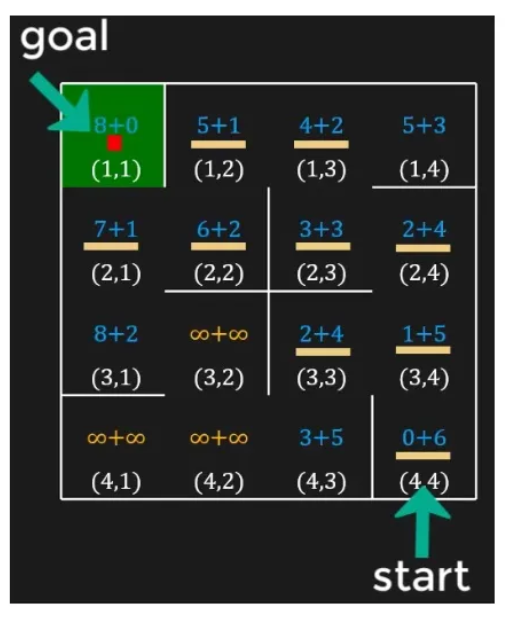

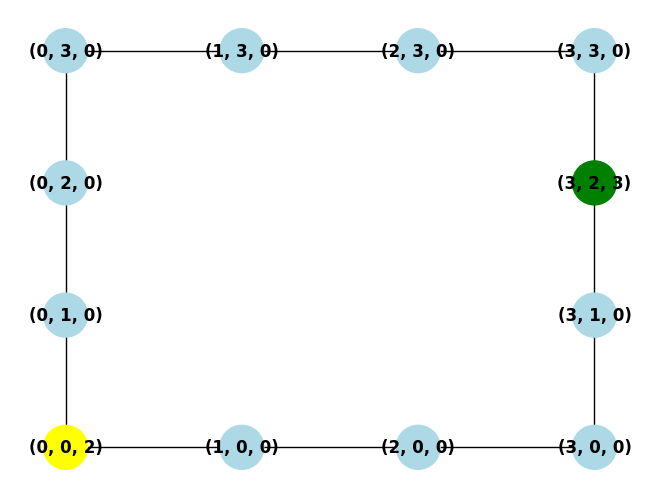

DFS Path: [(0, 0, 2), (0, 1, 0), (0, 2, 0), (0, 3, 0), (1, 3, 0), (2, 3, 0), (3, 3, 0), (3, 2, 3)]
BFS Path: [(0, 0, 2), (1, 0, 0), (2, 0, 0), (3, 0, 0), (3, 1, 0), (3, 2, 3)]
A* Path: [(0, 0, 2), (1, 0, 0), (2, 0, 0), (3, 0, 0), (3, 1, 0), (3, 2, 3)]


In [83]:
graph.plot_graph()

start_vertex = (0, 0, 2)
goal_vertex = (3, 2, 3)
# Calculate and print pathS
print("DFS Path:", graph.dfs(start_vertex, goal_vertex))
print("BFS Path:", graph.bfs(start_vertex, goal_vertex))
print("A* Path:", graph.a_star(start_vertex, goal_vertex))

<ipython-input-84-22872ef691d8>:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=color, edgecolor='black'))


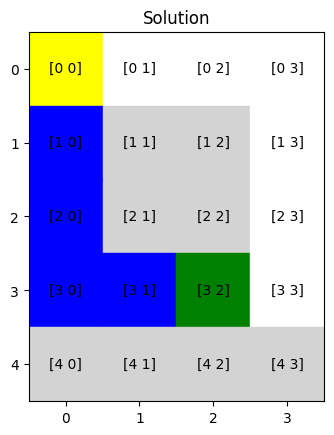

In [84]:
# Plot the coordinates matrix
plt.imshow(matrix, cmap='gray', interpolation='nearest')

# Highlight the path in blue
path = graph.a_star(start_vertex, goal_vertex)
path = path[1:-1]
path_coordinates = [(x, y) for x, y, _ in path]

# Add colors based on the dictionary of values
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        value = coordinates_values[(i, j)]
        color = colors[value]
        if (i, j) in path_coordinates:
            color = 'blue'  # Change color to blue if cell is in the path
        plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=color, edgecolor='black'))
        plt.text(j, i, str(coordinates[i, j]), ha='center', va='center')

plt.title('Solution')
plt.grid(False)

plt.show()